# Closer Challenge - Definition


Segment clients for better markting campaigns

# Imports

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [2]:
dataset = pd.read_excel('../data/dataset.xlsx')

In [3]:
dfInsurance = dataset.copy()

# Dataset Global Information

## Data structure

Tamanho (\#rows): 10296   
\# Colunas: 14
Duplicados (Alto nível): 0

## Statistics by column

| Column                              | Missing Values | Mean/Top    | St.dev      |
|-------------------------------------|----------------|-------------|-------------|
| Customer Identity                   | 0              | 5148.500000 | 2972.343520 |
| First Policy´s Year                 | 30             | 1991.062634 | 511.267913  |
| Customer Age                        | 17             | 47.992217   | 19.709476   |
| Educational Degree                  | 17             | 3 - BSc/MSc | -           |
| Gross Monthly Salary                | 36             | 5012.838557 | 2314.900605 |
| Geographic Living Area              | 1              | 2.709859    | 1.266291    |
| Has Children (Y=1)                  | 21             | 0.706764    | 0.455268    |
| Customer Monetary Value             | 0              | 177.892604  | 1945.811545 |
| Claims Rate                         | 0              | 0.742785    | 2.916957    |
| Premiums in LOB: Motor              | 34             | 300.470252  | 211.914997  |
| Premiums in LOB: Household          | 0              | 210.431192  | 352.595984  |
| Premiums in LOB: Health             | 43             | 171.580833  | 296.405976  |
| Premiums in LOB: Life               | 104            | 41.855782   | 47.480632   |
| Premiums in LOB: Work Compensations | 86             | 41.277514   | 51.513572   |

# Mapping column names

| Original Column                     | Changed column     |
|-------------------------------------|--------------------|
| Customer Identity                   | cod_cust_id        |
| First Policy´s Year                 | dt_fpy             |
| Customer Age                        | atr_cust_age       |
| Educational Degree                  | dsc_edu_deg        |
| Gross Monthly Salary                | amt_gms            |
| Geographic Living Area              | atr_gla            |
| Has Children (Y=1)                  | flg_childen        |
| Customer Monetary Value             | amt_cmv            |
| Claims Rate                         | rt_cr              |
| Premiums in LOB: Motor              | amt_lob_motor      |
| Premiums in LOB: Household          | amt_plob_household |
| Premiums in LOB: Health             | amt_plob_health    |
| Premiums in LOB: Life               | amt_plob_life      |
| Premiums in LOB: Work Compensations | amt_plob_wcomp     |

In [4]:
columns_map = {"Customer Identity":"cod_cust_id",
                "First Policy´s Year": "dt_fpy",
                "Customer Age": "atr_cust_age",
                "Educational Degree":"dsc_edu_deg",
                "Gross Monthly Salary": "amt_gms",
                "Geographic Living Area": "atr_gla",
                "Has Children (Y=1)":"flg_childen",
                "Customer Monetary Value":"amt_cmv",
                "Claims Rate":"rt_cr",
                "Premiums in LOB: Motor":"amt_plob_motor",
                "Premiums in LOB: Household":"amt_plob_household",
                "Premiums in LOB: Health":"amt_plob_health",
                "Premiums in LOB:  Life":"amt_plob_life",
                "Premiums in LOB: Work Compensations":"amt_plob_wcomp"}

columns_map_reverse = {v: k for k, v in columns_map.items()}

dfInsurance = dfInsurance.rename(columns=columns_map)

dfInsurance.head(1)

,cod_cust_id,dt_fpy,atr_cust_age,dsc_edu_deg,amt_gms,atr_gla,flg_childen,amt_cmv,rt_cr,amt_plob_motor,amt_plob_household,amt_plob_health,amt_plob_life,amt_plob_wcomp
0,1,1985.0,34.0,2 - High School,4354.0,1.0,1.0,380.97,0.390032,375.85,79.45,146.36,47.01,16.89


In [5]:
columns_map_reverse

{'cod_cust_id': 'Customer Identity',
 'dt_fpy': 'First Policy´s Year',
 'atr_cust_age': 'Customer Age',
 'dsc_edu_deg': 'Educational Degree',
 'amt_gms': 'Gross Monthly Salary',
 'atr_gla': 'Geographic Living Area',
 'flg_childen': 'Has Children (Y=1)',
 'amt_cmv': 'Customer Monetary Value',
 'rt_cr': 'Claims Rate',
 'amt_plob_motor': 'Premiums in LOB: Motor',
 'amt_plob_household': 'Premiums in LOB: Household',
 'amt_plob_health': 'Premiums in LOB: Health',
 'amt_plob_life': 'Premiums in LOB:  Life',
 'amt_plob_wcomp': 'Premiums in LOB: Work Compensations'}

# Questions

## Project Roadmap
* What can we ask the data to get insights.
* What can we do with the data to introduce ML techniques


Clientes com + de 1 LOB |--> CMV por \# LOB's | Educational Degrees   
First Policy´s Year CORR Customer Monetary Value || Customer Monetary Value CORR Claims Rate

## Feature Engineering

- [X] (atr_edu_deg) Educational Degree to int -- Make the feature an integer to be ingested posteriorly in analysis and ML
- [X] (amt_premium_total) Premium LOB's Total -- Total of LOB's premium can be a rich feature
- [ ] (nome_da_var) nome da variavel descritivo -- Introdução/descrição da variavel

## Data Constraints 

* Some clients have negative (below 0) premiums, why? (possible association with CMV?)
* 

## Data Cohesion

* Uma data está com o valor 53784.00
* Um customer tem a idate de 988.00
* Um CMV com o valor -165680.424 e CR de 250 e picos | Conclusão: Remover cliente   
^ 3 observações. Decisão: Remover estas observações.

## Description of the data

In [6]:
# Overview
dfInsurance.head()

,cod_cust_id,dt_fpy,atr_cust_age,dsc_edu_deg,amt_gms,atr_gla,flg_childen,amt_cmv,rt_cr,amt_plob_motor,amt_plob_household,amt_plob_health,amt_plob_life,amt_plob_wcomp
0,1,1985.0,34.0,2 - High School,4354.0,1.0,1.0,380.97,0.390032,375.85,79.45,146.36,47.01,16.89
1,2,1981.0,21.0,2 - High School,1353.0,4.0,1.0,-131.13,1.116503,77.46,416.20,116.69,194.48,106.13
2,3,1991.0,46.0,1 - Basic,4554.0,3.0,0.0,504.67,0.284810,206.15,224.50,124.58,86.35,99.02
3,4,1990.0,35.0,3 - BSc/MSc,2197.0,4.0,1.0,-16.99,0.986665,182.48,43.35,311.17,35.34,28.34
4,5,1986.0,43.0,3 - BSc/MSc,3526.0,4.0,1.0,35.23,0.904281,338.62,47.80,182.59,18.78,41.45


In [7]:
# Shape dos dados
dfInsurance.shape

(10296, 14)

In [8]:
# Info dos tipos de objecto por coluna
dfInsurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cod_cust_id         10296 non-null  int64  
 1   dt_fpy              10266 non-null  float64
 2   atr_cust_age        10279 non-null  float64
 3   dsc_edu_deg         10279 non-null  object 
 4   amt_gms             10260 non-null  float64
 5   atr_gla             10295 non-null  float64
 6   flg_childen         10275 non-null  float64
 7   amt_cmv             10296 non-null  float64
 8   rt_cr               10296 non-null  float64
 9   amt_plob_motor      10262 non-null  float64
 10  amt_plob_household  10296 non-null  float64
 11  amt_plob_health     10253 non-null  float64
 12  amt_plob_life       10192 non-null  float64
 13  amt_plob_wcomp      10210 non-null  float64
dtypes: float64(12), int64(1), object(1)
memory usage: 1.1+ MB


In [9]:
# Valores nulos das colunas
dfInsurance.isna().sum()

cod_cust_id             0
dt_fpy                 30
atr_cust_age           17
dsc_edu_deg            17
amt_gms                36
atr_gla                 1
flg_childen            21
amt_cmv                 0
rt_cr                   0
amt_plob_motor         34
amt_plob_household      0
amt_plob_health        43
amt_plob_life         104
amt_plob_wcomp         86
dtype: int64

In [10]:
# Estatísticas Colunas (1)
dfInsurance.describe().T

,count,mean,std,min,25%,50%,75%,max
cod_cust_id,10296.0,5148.500000,2972.343520,1.000,2574.750000,5148.500000,7722.250000,10296.00
dt_fpy,10266.0,1991.062634,511.267913,1974.000,1980.000000,1986.000000,1992.000000,53784.00
atr_cust_age,10279.0,47.992217,19.709476,15.000,33.000000,48.000000,63.000000,988.00
amt_gms,10260.0,5012.838557,2314.900605,665.000,3411.000000,5002.500000,6580.250000,110429.76
atr_gla,10295.0,2.709859,1.266291,1.000,1.000000,3.000000,4.000000,4.00
flg_childen,10275.0,0.706764,0.455268,0.000,0.000000,1.000000,1.000000,1.00
amt_cmv,10296.0,177.892604,1945.811545,-165680.424,-9.440000,186.870000,399.777500,11875.89
rt_cr,10296.0,0.742785,2.916957,0.000,0.392437,0.720657,0.976811,256.20
amt_plob_motor,10262.0,300.470252,211.914997,-4.110,190.590000,298.610000,408.300000,11604.42
amt_plob_household,10296.0,210.431192,352.595984,-75.000,49.450000,132.800000,290.050000,25048.80


In [11]:
# Estatísticas Colunas (1)
dfInsurance.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
cod_cust_id,10296.0,NaN,NaN,NaN,5148.5,2972.34352,1.0,2574.75,5148.5,7722.25,10296.0
dt_fpy,10266.0,NaN,NaN,NaN,1991.062634,511.267913,1974.0,1980.0,1986.0,1992.0,53784.0
atr_cust_age,10279.0,NaN,NaN,NaN,47.992217,19.709476,15.0,33.0,48.0,63.0,988.0
dsc_edu_deg,10279,4,3 - BSc/MSc,4799,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amt_gms,10260.0,NaN,NaN,NaN,5012.838557,2314.900605,665.0,3411.0,5002.5,6580.25,110429.76
atr_gla,10295.0,NaN,NaN,NaN,2.709859,1.266291,1.0,1.0,3.0,4.0,4.0
flg_childen,10275.0,NaN,NaN,NaN,0.706764,0.455268,0.0,0.0,1.0,1.0,1.0
amt_cmv,10296.0,NaN,NaN,NaN,177.892604,1945.811545,-165680.424,-9.44,186.87,399.7775,11875.89
rt_cr,10296.0,NaN,NaN,NaN,0.742785,2.916957,0.0,0.392437,0.720657,0.976811,256.2
amt_plob_motor,10262.0,NaN,NaN,NaN,300.470252,211.914997,-4.11,190.59,298.61,408.3,11604.42


In [12]:
cat_3 = dfInsurance.loc[dfInsurance['dsc_edu_deg'] == '3 - BSc/MSc']

In [13]:
# Duplicados a alto nível
dfInsurance.duplicated().sum()

0

### Premium LOB's - Missing data

Missings:  
Premiums in LOB: Motor                  13 (34 total)   
Premiums in LOB: Household               0   
Premiums in LOB: Health                 14 (43 total)   
Premiums in LOB:  Life                 104   
Premiums in LOB: Work Compensations     12 (86 total)  

In [14]:
LOB_LIFE_NULLS = dfInsurance.loc[dfInsurance['amt_plob_life'].isnull()]

In [15]:
LOB_LIFE_NULLS.isnull().sum()

cod_cust_id             0
dt_fpy                  0
atr_cust_age            0
dsc_edu_deg             0
amt_gms                 1
atr_gla                 0
flg_childen             0
amt_cmv                 0
rt_cr                   0
amt_plob_motor         13
amt_plob_household      0
amt_plob_health        14
amt_plob_life         104
amt_plob_wcomp         12
dtype: int64

In [16]:
LOB_LIFE_NULLS.describe()

,cod_cust_id,dt_fpy,atr_cust_age,amt_gms,atr_gla,flg_childen,amt_cmv,rt_cr,amt_plob_motor,amt_plob_household,amt_plob_health,amt_plob_life,amt_plob_wcomp
count,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000,91.000000,104.000000,90.000000,0.0,92.000000
mean,5155.615385,1985.961538,49.923077,5157.067961,2.548077,0.730769,165.425000,0.599319,410.724505,73.636538,128.888667,NaN,23.457174
std,2823.759603,7.037932,13.915621,1577.002544,1.229727,0.445708,253.744105,0.423286,123.952698,145.871322,78.684998,NaN,38.680801
min,69.000000,1974.000000,19.000000,2028.000000,1.000000,0.000000,-187.000000,0.000000,35.340000,-75.000000,15.670000,NaN,-12.000000
25%,2927.750000,1980.000000,38.000000,3827.000000,1.000000,0.000000,-25.302500,0.147406,334.730000,0.000000,61.010000,NaN,3.862500
50%,5088.500000,1986.000000,51.500000,5102.000000,3.000000,1.000000,18.675000,0.693134,434.080000,38.900000,119.300000,NaN,12.445000
75%,7281.250000,1992.000000,60.250000,6385.500000,4.000000,1.000000,411.867500,1.000526,510.430000,93.625000,197.177500,NaN,27.560000
max,10143.000000,1998.000000,79.000000,8970.000000,4.000000,1.000000,1000.750000,1.312139,562.440000,1015.750000,338.730000,NaN,313.950000


### Outliers - CMV & Claims Rate & Custumer Age & FPY

In [17]:
OUT_CMV = dfInsurance.loc[dfInsurance['amt_cmv'] < -160000]

In [18]:
OUT_CMV

,cod_cust_id,dt_fpy,atr_cust_age,dsc_edu_deg,amt_gms,atr_gla,flg_childen,amt_cmv,rt_cr,amt_plob_motor,amt_plob_household,amt_plob_health,amt_plob_life,amt_plob_wcomp
171,172,1990.0,27.0,3 - BSc/MSc,2172.0,4.0,1.0,-165680.424,256.2,378.07,78.9,166.81,6.89,18.45


In [19]:
OUT_CustAge = dfInsurance.loc[dfInsurance['atr_cust_age'] > 100]
OUT_CustAge
# 2 Alternativas: Remover ou Trocar pela média/mediana de idades.

,cod_cust_id,dt_fpy,atr_cust_age,dsc_edu_deg,amt_gms,atr_gla,flg_childen,amt_cmv,rt_cr,amt_plob_motor,amt_plob_household,amt_plob_health,amt_plob_life,amt_plob_wcomp
7195,7196,1993.0,988.0,3 - BSc/MSc,5659.0,4.0,0.0,146.02,0.773855,428.97,192.8,108.91,1.89,23.67


In [20]:
OUT_FPY = dfInsurance.loc[dfInsurance['dt_fpy'] > 2022]
OUT_FPY
# 2 Alternativas: Remover ou Trocar pela média/mediana de idades.

,cod_cust_id,dt_fpy,atr_cust_age,dsc_edu_deg,amt_gms,atr_gla,flg_childen,amt_cmv,rt_cr,amt_plob_motor,amt_plob_household,amt_plob_health,amt_plob_life,amt_plob_wcomp
9294,9295,53784.0,68.0,3 - BSc/MSc,6535.0,1.0,0.0,348.85,0.370623,351.4,15.0,187.37,22.45,17.78


# Filters

## Impossible values 

We found at least two datapoints that have no conceptual sense.   
One where the first policuy year is FAR into the future, and another where the customer age is simply impossible.  
The first we filtered to no data above 2022, the second for no customer age above 100 years of age.

In [21]:
dfInsurance_old = dfInsurance.copy()

In [22]:
dfInsurance = dfInsurance.loc[~((dfInsurance['dt_fpy'] > 2022) | 
                        (dfInsurance['atr_cust_age'] > 100))]

In [23]:
dfInsurance

,cod_cust_id,dt_fpy,atr_cust_age,dsc_edu_deg,amt_gms,atr_gla,flg_childen,amt_cmv,rt_cr,amt_plob_motor,amt_plob_household,amt_plob_health,amt_plob_life,amt_plob_wcomp
0,1,1985.0,34.0,2 - High School,4354.0,1.0,1.0,380.97,0.390032,375.85,79.45,146.36,47.01,16.89
1,2,1981.0,21.0,2 - High School,1353.0,4.0,1.0,-131.13,1.116503,77.46,416.20,116.69,194.48,106.13
2,3,1991.0,46.0,1 - Basic,4554.0,3.0,0.0,504.67,0.284810,206.15,224.50,124.58,86.35,99.02
3,4,1990.0,35.0,3 - BSc/MSc,2197.0,4.0,1.0,-16.99,0.986665,182.48,43.35,311.17,35.34,28.34
4,5,1986.0,43.0,3 - BSc/MSc,3526.0,4.0,1.0,35.23,0.904281,338.62,47.80,182.59,18.78,41.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10291,10292,1984.0,67.0,4 - PhD,6375.0,2.0,0.0,-0.11,0.961204,393.74,49.45,173.81,9.78,14.78
10292,10293,1977.0,64.0,1 - Basic,4862.0,3.0,0.0,1405.60,0.000000,133.58,1035.75,143.25,12.89,105.13
10293,10294,1994.0,40.0,3 - BSc/MSc,5835.0,1.0,1.0,524.10,0.211335,403.63,132.80,142.25,12.67,4.89
10294,10295,1981.0,39.0,1 - Basic,3941.0,2.0,1.0,250.05,0.645060,188.59,211.15,198.37,63.90,112.91


## Outliers 

[!] To verify CMV and CR outliers

# Transformations

## Educational Degree to Integer

In [24]:
dfInsurance['atr_edu_deg'] = dfInsurance['dsc_edu_deg'].map(lambda x: str(x)[0])

## Premium LOB's - Total

In [25]:
# Total de premiums (LOBs)
dfInsurance['amt_premium_total'] = (dfInsurance['amt_plob_life'] + dfInsurance['amt_plob_household'] + dfInsurance['amt_plob_motor'] + 
                                    dfInsurance['amt_plob_health']+ dfInsurance['amt_plob_wcomp'])

In [26]:
dfInsurance

,cod_cust_id,dt_fpy,atr_cust_age,dsc_edu_deg,amt_gms,atr_gla,flg_childen,amt_cmv,rt_cr,amt_plob_motor,amt_plob_household,amt_plob_health,amt_plob_life,amt_plob_wcomp,atr_edu_deg,amt_premium_total
0,1,1985.0,34.0,2 - High School,4354.0,1.0,1.0,380.97,0.390032,375.85,79.45,146.36,47.01,16.89,2,665.56
1,2,1981.0,21.0,2 - High School,1353.0,4.0,1.0,-131.13,1.116503,77.46,416.20,116.69,194.48,106.13,2,910.96
2,3,1991.0,46.0,1 - Basic,4554.0,3.0,0.0,504.67,0.284810,206.15,224.50,124.58,86.35,99.02,1,740.60
3,4,1990.0,35.0,3 - BSc/MSc,2197.0,4.0,1.0,-16.99,0.986665,182.48,43.35,311.17,35.34,28.34,3,600.68
4,5,1986.0,43.0,3 - BSc/MSc,3526.0,4.0,1.0,35.23,0.904281,338.62,47.80,182.59,18.78,41.45,3,629.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10291,10292,1984.0,67.0,4 - PhD,6375.0,2.0,0.0,-0.11,0.961204,393.74,49.45,173.81,9.78,14.78,4,641.56
10292,10293,1977.0,64.0,1 - Basic,4862.0,3.0,0.0,1405.60,0.000000,133.58,1035.75,143.25,12.89,105.13,1,1430.60
10293,10294,1994.0,40.0,3 - BSc/MSc,5835.0,1.0,1.0,524.10,0.211335,403.63,132.80,142.25,12.67,4.89,3,696.24
10294,10295,1981.0,39.0,1 - Basic,3941.0,2.0,1.0,250.05,0.645060,188.59,211.15,198.37,63.90,112.91,1,774.92


# Distribution of features

In [27]:
dfInsurance.columns

Index(['cod_cust_id', 'dt_fpy', 'atr_cust_age', 'dsc_edu_deg', 'amt_gms',
       'atr_gla', 'flg_childen', 'amt_cmv', 'rt_cr', 'amt_plob_motor',
       'amt_plob_household', 'amt_plob_health', 'amt_plob_life',
       'amt_plob_wcomp', 'atr_edu_deg', 'amt_premium_total'],
      dtype='object')

## First Policy's Year

[!] Improve plot appeal

In [28]:
min_FPY = min(dfInsurance['dt_fpy'])
max_FPY = max(dfInsurance['dt_fpy'])
n_bins = max_FPY - min_FPY

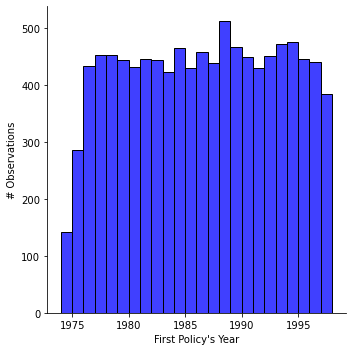

In [29]:
%matplotlib inline
sns.displot(dfInsurance['dt_fpy'], kind = 'hist',
             color = 'blue', bins = int(n_bins))

plt.xlabel("First Policy's Year")
plt.ylabel("# Observations")

plt.show()

## Customer Age

[!] Improve plot appeal

In [30]:
min_CustA = min(dfInsurance['atr_cust_age'])
max_CustA = max(dfInsurance['atr_cust_age'])
n_bins = max_CustA - min_CustA

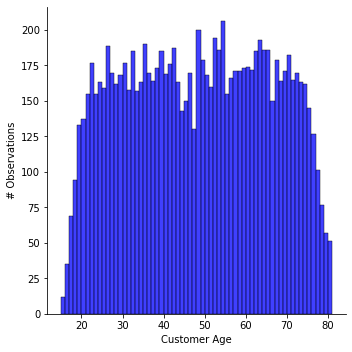

In [31]:
sns.displot(dfInsurance['atr_cust_age'], kind = 'hist', 
             color = 'blue', bins = int(n_bins))

plt.xlabel("Customer Age")
plt.ylabel("# Observations")

plt.show()

### Customer Age VS All features

https://stackoverflow.com/questions/63083489/how-to-add-labels-to-a-pairplot  
https://www.geeksforgeeks.org/python-get-dictionary-keys-as-a-list/

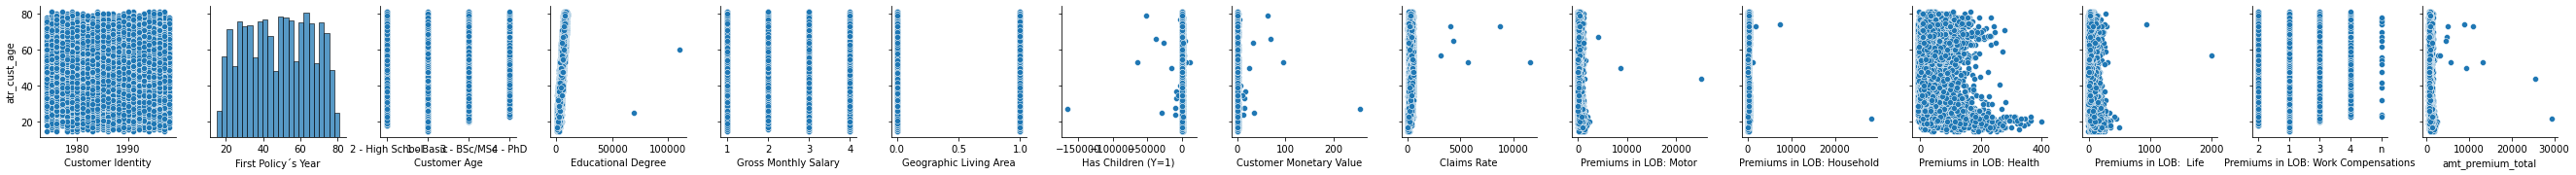

In [32]:
plot_columns = [column for column in dfInsurance.columns if column not in ['cod_cust_id']]
g = sns.pairplot(data=dfInsurance,
            y_vars=['atr_cust_age'],
            x_vars=plot_columns)

for ax, lbl in zip(g.axes.flatten(), [*columns_map_reverse]):
    # print(ax, lbl)
    ax.set_xlabel(f'{columns_map_reverse[lbl]}')

In [33]:
dfInsurance.columns

Index(['cod_cust_id', 'dt_fpy', 'atr_cust_age', 'dsc_edu_deg', 'amt_gms',
       'atr_gla', 'flg_childen', 'amt_cmv', 'rt_cr', 'amt_plob_motor',
       'amt_plob_household', 'amt_plob_health', 'amt_plob_life',
       'amt_plob_wcomp', 'atr_edu_deg', 'amt_premium_total'],
      dtype='object')

In [34]:
dfInsurance.drop(columns=['cod_cust_id'], inplace=True)

In [35]:
dataset.columns

Index(['Customer Identity', 'First Policy´s Year', 'Customer Age',
       'Educational Degree', 'Gross Monthly Salary', 'Geographic Living Area',
       'Has Children (Y=1)', 'Customer Monetary Value', 'Claims Rate',
       'Premiums in LOB: Motor', 'Premiums in LOB: Household',
       'Premiums in LOB: Health', 'Premiums in LOB:  Life',
       'Premiums in LOB: Work Compensations'],
      dtype='object')

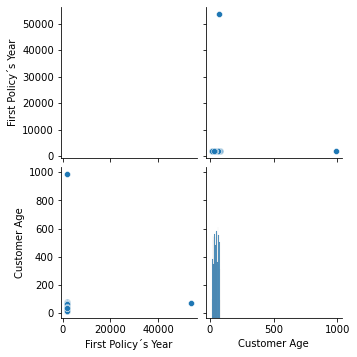

In [36]:
sns.pairplot(dataset.loc[0:,'First Policy´s Year':'Customer Age']);

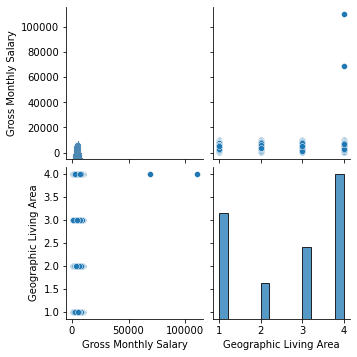

In [37]:
sns.pairplot(dataset.loc[0:, 'Gross Monthly Salary':'Geographic Living Area']);

In [38]:
dataset.columns

Index(['Customer Identity', 'First Policy´s Year', 'Customer Age',
       'Educational Degree', 'Gross Monthly Salary', 'Geographic Living Area',
       'Has Children (Y=1)', 'Customer Monetary Value', 'Claims Rate',
       'Premiums in LOB: Motor', 'Premiums in LOB: Household',
       'Premiums in LOB: Health', 'Premiums in LOB:  Life',
       'Premiums in LOB: Work Compensations'],
      dtype='object')

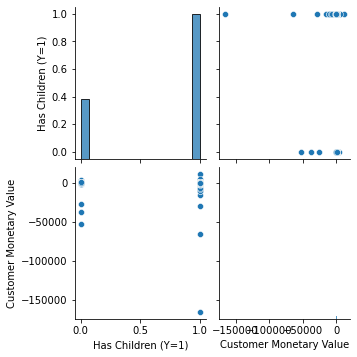

In [39]:
sns.pairplot(dataset.loc[0:, 'Has Children (Y=1)':'Customer Monetary Value']);

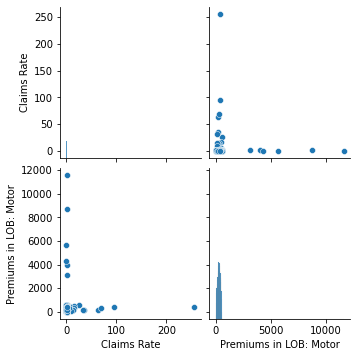

In [40]:
sns.pairplot(dataset.loc[0:, 'Claims Rate':'Premiums in LOB: Motor']);

In [ ]:
Customer Identity	cod_cust_id
First Policy´s Year	dt_fpy
Customer Age	atr_cust_age
Educational Degree	dsc_edu_deg
Gross Monthly Salary	amt_gms
Geographic Living Area	atr_gla
Has Children (Y=1)	flg_childen
Customer Monetary Value	amt_cmv
Claims Rate	rt_cr
Premiums in LOB: Motor	amt_lob_motor
Premiums in LOB: Household	amt_plob_household
Premiums in LOB: Health	amt_plob_health
Premiums in LOB: Life	amt_plob_life
Premiums in LOB: Work Compensations	amt_plob_wcomp

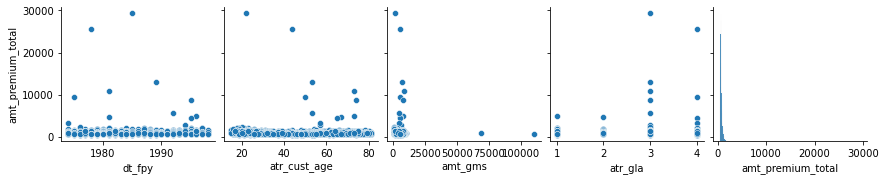

In [42]:
pp = sns.pairplot(data=dfInsurance,
                  y_vars=['amt_premium_total'],
                  x_vars=['dt_fpy', 'atr_cust_age', 'amt_gms', 'atr_gla',
                         'amt_premium_total'])

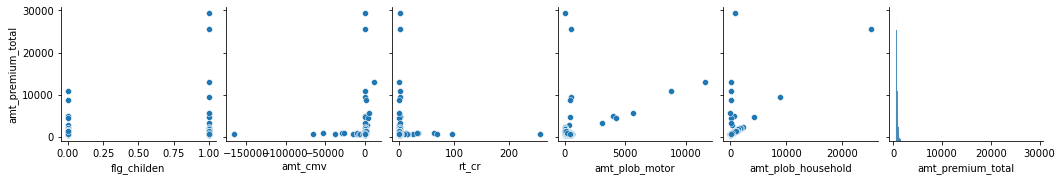

In [46]:
pp = sns.pairplot(data=dfInsurance,
                  y_vars=['amt_premium_total'],
                  x_vars=['flg_childen', 'amt_cmv', 'rt_cr', 
                          'amt_plob_motor', 'amt_plob_household',
                         'amt_premium_total'])

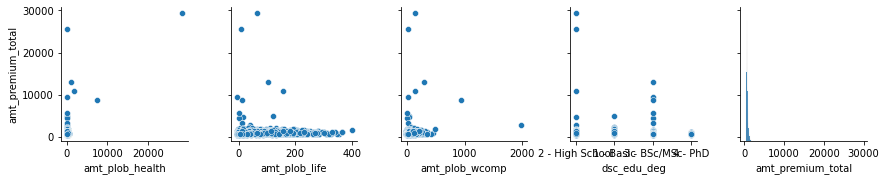

In [47]:
pp = sns.pairplot(data=dfInsurance,
                  y_vars=['amt_premium_total'],
                  x_vars=['amt_plob_health', 'amt_plob_life', 'amt_plob_wcomp', 
                          'dsc_edu_deg', 'amt_premium_total'])

In [51]:
data_back = dfInsurance.copy()

Separação em 2 datasets

* A = valores normais
* B = valores extremos

<AxesSubplot:>

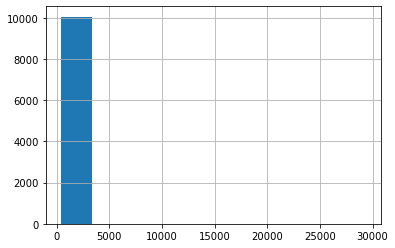

In [52]:
data_back['amt_premium_total'].hist(bins=10)

In [53]:
data_back.columns

Index(['dt_fpy', 'atr_cust_age', 'dsc_edu_deg', 'amt_gms', 'atr_gla',
       'flg_childen', 'amt_cmv', 'rt_cr', 'amt_plob_motor',
       'amt_plob_household', 'amt_plob_health', 'amt_plob_life',
       'amt_plob_wcomp', 'atr_edu_deg', 'amt_premium_total'],
      dtype='object')

In [56]:
df_bck_a = data_back.loc[~((data_back['dt_fpy'] > 2022) | 
                        (data_back['atr_cust_age'] > 100) | 
                        (data_back['amt_cmv'] < -160000) |
                          (data_back['amt_gms']> 15000) |
                        (data_back['rt_cr'] > 2) |
                          (data_back['amt_plob_motor'] > 2000)|
                          (data_back['amt_plob_household'] > 5000)|
                          (data_back['amt_plob_health'] > 5000)|
                          (data_back['amt_plob_wcomp'] > 500)|
                          (data_back['amt_premium_total'] > 5000))]

<AxesSubplot:>

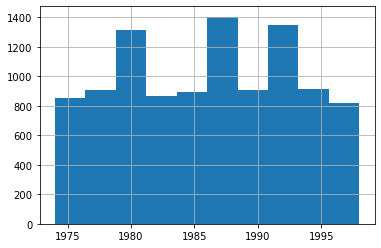

In [59]:
df_bck_a['dt_fpy'].hist(bins=10)

<AxesSubplot:>

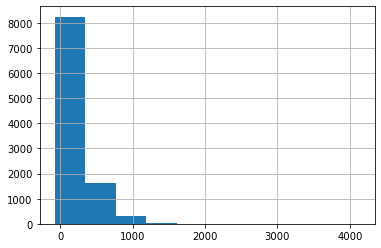

In [60]:
df_bck_a['amt_plob_household'].hist(bins=10)

<AxesSubplot:>

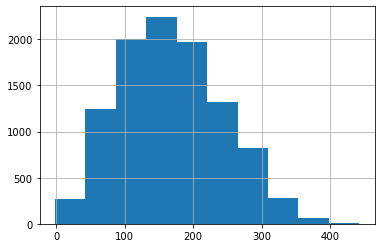

In [61]:
df_bck_a['amt_plob_health'].hist(bins=10)

<AxesSubplot:>

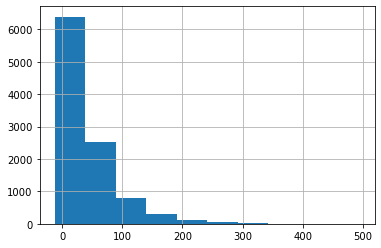

In [62]:
df_bck_a['amt_plob_wcomp'].hist(bins=10)

<AxesSubplot:>

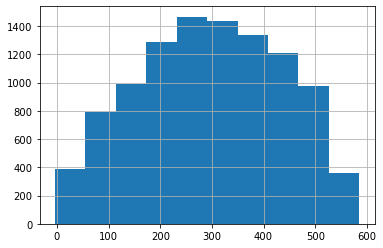

In [63]:
df_bck_a['amt_plob_motor'].hist(bins=10)

<AxesSubplot:>

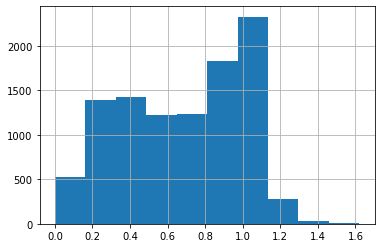

In [64]:
df_bck_a['rt_cr'].hist(bins=10)

In [65]:
df_bck_b = data_back.loc[((data_back['dt_fpy'] > 2022) | 
                        (data_back['atr_cust_age'] > 100) | 
                        (data_back['amt_cmv'] < -160000) |
                          (data_back['amt_gms']> 15000) |
                        (data_back['rt_cr'] > 2) |
                          (data_back['amt_plob_motor'] > 2000)|
                          (data_back['amt_plob_household'] > 5000)|
                          (data_back['amt_plob_health'] > 5000)|
                          (data_back['amt_plob_wcomp'] > 500)|
                          (data_back['amt_premium_total'] > 5000))]